In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #adjust the configuration of the plot we need to create

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Ogele\Downloads\MOVIES(csv).csv')

In [4]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [5]:
#checking for missing datas

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#checking data type
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Check for infinite values in a specific column
is_infinite = np.isinf(df['gross'])

# Filter the DataFrame to get rows with infinite values in the column
rows_with_infinite = df[is_infinite]

# Print the rows with infinite values
print(rows_with_infinite)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [8]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [11]:
# Remove rows with non-finite values
df = df.dropna(subset=['votes', 'budget', 'gross'])

# Convert specific columns from float to integer
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# Print the updated DataFrame
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [14]:
df.sort_values(by=['gross'],inplace=False, ascending=False )

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [13]:
pd.set_option('display.max_row', None)

In [92]:
#to arrnge the relase date with date year coming first




df['year'] = df['released'].str.extract(r'(\d{4})')

print(df['year'])

df.head()


0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1981
9       1980
10      1980
11      1984
12      1980
13      1980
14      1980
15      1980
17      1980
18      1980
20      1980
21      1981
22      1980
23      1980
28      1980
29      1980
33      1981
35      1980
36      1980
37      1980
42      1980
46      1980
48      1980
50      1980
51      1980
53      1980
56      1980
57      1980
58      1980
75      1980
77      1980
80      1980
92      1981
94      1981
95      1981
96      1983
97      1982
98      1981
99      1981
100     1981
101     1982
103     1981
105     1981
106     1981
108     1981
110     1981
112     1981
113     1981
114     1981
115     1981
117     1981
118     1982
119     1981
120     1981
121     1981
122     1981
126     1981
127     1981
128     1981
129     1982
130     1982
131     1981
132     1981
133     1981
134     1981
136     1981
137     1981
139     1981
141     1981

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

        released  score    votes         director                   writer  \
0  June 13, 1980    8.4   927000  Stanley Kubrick             Stephen King   
1   July 2, 1980    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole   
2  June 20, 1980    8.7  1200000   Irvin Kershner           Leigh Brackett   
3   July 2, 1980    7.7   221000     Jim Abrahams             Jim Abrahams   
4  July 25, 1980    7.3   108000     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime  year  
0    146.0  1980  
1    104.0  1980  
2    124.0  1980  
3     88.0  1980  
4     98.0  1980

In [93]:


# adding the new colum in the table
df = df.drop('year', axis=1)
df.head()


name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

        released  score    votes         director                   writer  \
0  June 13, 1980    8.4   927000  Stanley Kubrick             Stephen King   
1   July 2, 1980    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole   
2  June 20, 1980    8.7  1200000   Irvin Kershner           Leigh Brackett   
3   July 2, 1980    7.7   221000     Jim Abrahams             Jim Abrahams   
4  July 25, 1980    7.3   108000     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime  
0    146.0  
1    104.0  
2    124.0  
3     88.0  
4     98.0

In [26]:
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

        released  score    votes         director                   writer  \
0  June 13, 1980    8.4   927000  Stanley Kubrick             Stephen King   
1   July 2, 1980    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole   
2  June 20, 1980    8.7  1200000   Irvin Kershner           Leigh Brackett   
3   July 2, 1980    7.7   221000     Jim Abrahams             Jim Abrahams   
4  July 25, 1980    7.3   108000     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime  
0    146.0  
1    104.0  
2    124.0  
3     88.0  
4     98.0

In [27]:

df['year'] = df['released'].str.extract(r'(\d{4})')

print(df['year'])

0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1981
9       1980
10      1980
11      1984
12      1980
13      1980
14      1980
15      1980
17      1980
18      1980
20      1980
21      1981
22      1980
23      1980
28      1980
29      1980
33      1981
35      1980
36      1980
37      1980
42      1980
46      1980
48      1980
50      1980
51      1980
53      1980
56      1980
57      1980
58      1980
75      1980
77      1980
80      1980
92      1981
94      1981
95      1981
96      1983
97      1982
98      1981
99      1981
100     1981
101     1982
103     1981
105     1981
106     1981
108     1981
110     1981
112     1981
113     1981
114     1981
115     1981
117     1981
118     1982
119     1981
120     1981
121     1981
122     1981
126     1981
127     1981
128     1981
129     1982
130     1982
131     1981
132     1981
133     1981
134     1981
136     1981
137     1981
139     1981
141     1981

In [36]:
#drop duplicate
df['company']=df['company'].drop_duplicates()

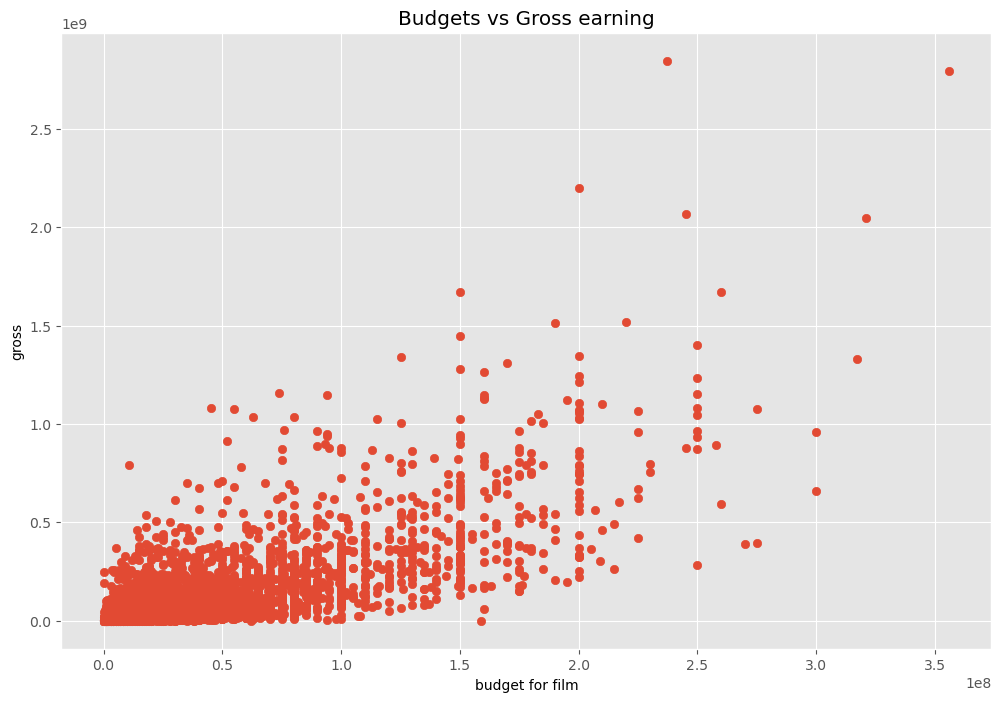

In [38]:
#checking corrolation with gross and budget, next with company
plt.scatter(df['budget'], df['gross'])
plt.xlabel('budget for film')
plt.ylabel('gross')
plt.title('Budgets vs Gross earning')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

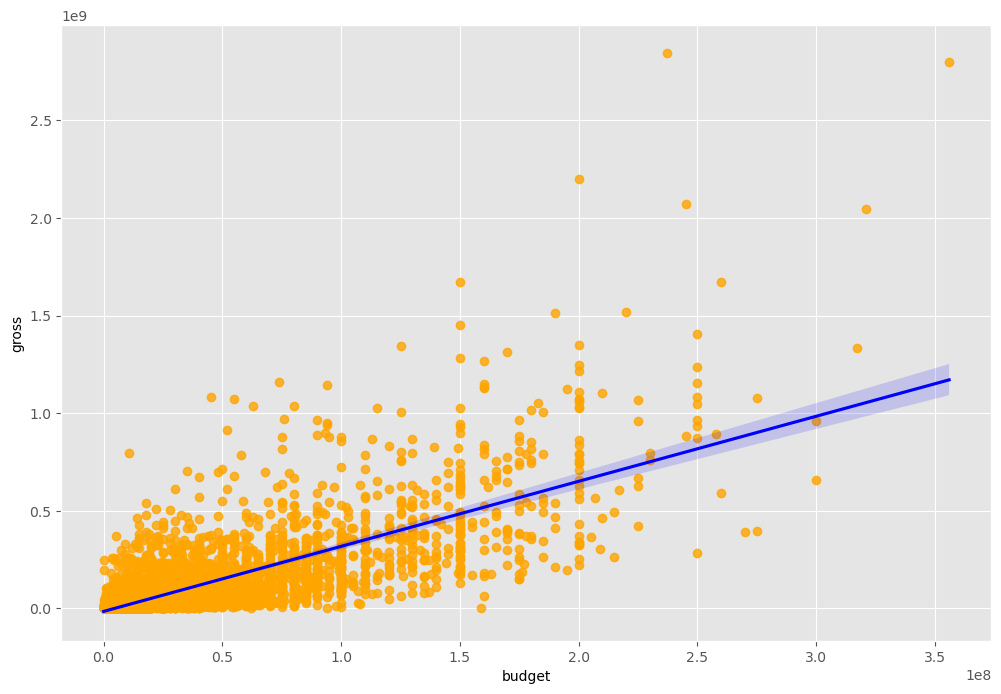

In [47]:
#using seasborn
sns.regplot(x='budget', y='gross', data= df,scatter_kws={"color":"orange"},line_kws={"color":"blue"})


In [48]:
#looking at corrolation{pearson, kend#all, spareman}(by default we're using pearson)
df.corr()

C:\Users\Ogele\AppData\Local\Temp\ipykernel_1564\2245238963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


score     votes    budget     gross   runtime
score    1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.414580  0.352437  0.318595  0.275596  1.000000

In [49]:
#the above implies that there's high correlation bettween gross and budget.

C:\Users\Ogele\AppData\Local\Temp\ipykernel_1564\3888486885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


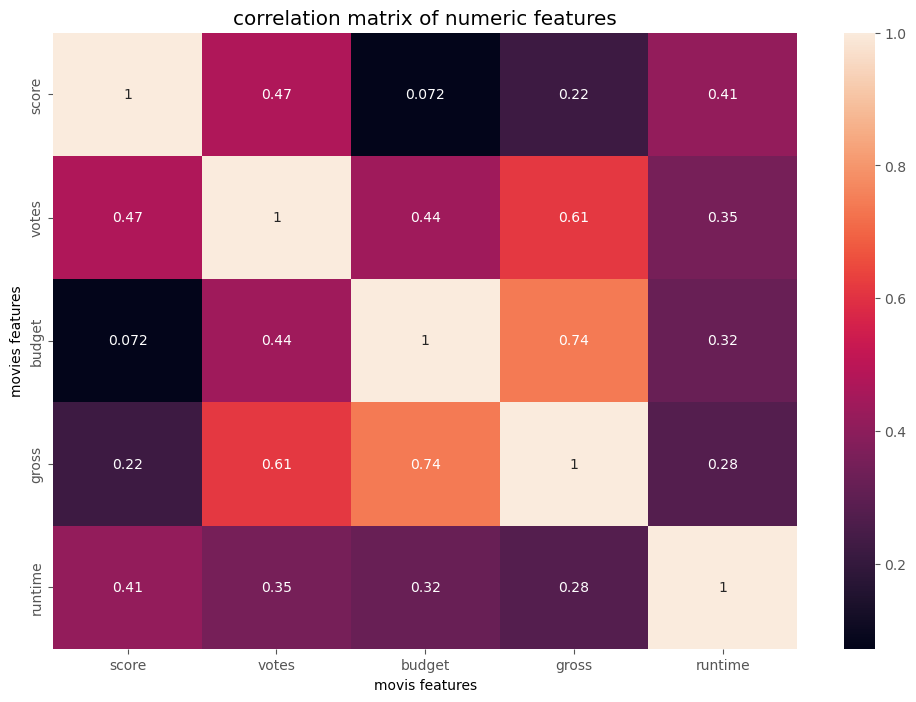

In [65]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix of numeric features')
plt.xlabel('movis features')
plt.ylabel('movies features')
plt.show()


In [94]:
df_numerized = df.copy()  # Create a copy of the original DataFrame

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()


name  rating  genre  released  score    votes  director  writer  star  \
0  4706       6      6      1242    8.4   927000      1800    2841   700   
1  3943       6      1      1068    5.8    65000      1581    1160   215   
2  3654       4      0      1291    8.7  1200000       759    1822  1161   
3   205       4      4      1068    7.7   221000       891    1416  1478   
4   734       6      4      1111    7.3   108000       721     352   272   

   country    budget      gross  company  runtime  
0       46  19000000   46998772     1432    146.0  
1       47   4500000   58853106      454    104.0  
2       47  18000000  538375067      949    124.0  
3       47   3500000   83453539     1114     88.0  
4       47   6000000   39846344     1089     98.0

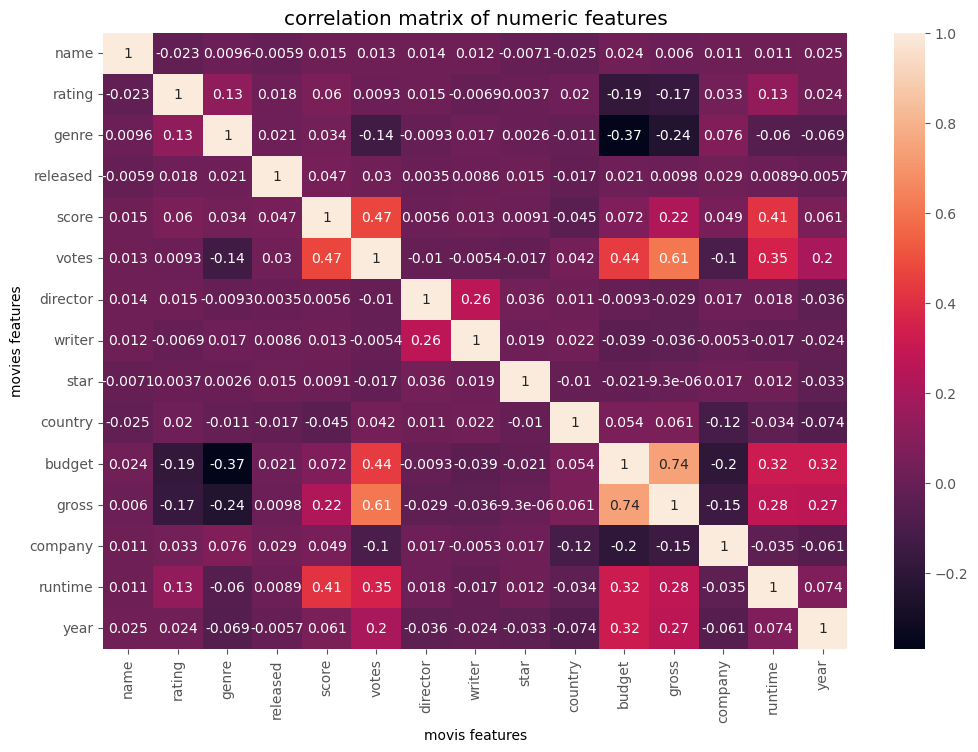

In [73]:
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix of numeric features')
plt.xlabel('movis features')
plt.ylabel('movies features')
plt.show()

In [75]:
df_numerized.corr()

name    rating     genre  released     score     votes  \
name      1.000000 -0.023013  0.009617 -0.005887  0.014955  0.012915   
rating   -0.023013  1.000000  0.128102  0.018096  0.059550  0.009255   
genre     0.009617  0.128102  1.000000  0.020867  0.034061 -0.136457   
released -0.005887  0.018096  0.020867  1.000000  0.046659  0.029816   
score     0.014955  0.059550  0.034061  0.046659  1.000000  0.473809   
votes     0.012915  0.009255 -0.136457  0.029816  0.473809  1.000000   
director  0.013699  0.014847 -0.009303  0.003518  0.005573 -0.010198   
writer    0.011602 -0.006923  0.017500  0.008589  0.012860 -0.005394   
star     -0.007109  0.003737  0.002619  0.015209  0.009121 -0.017140   
country  -0.024555  0.020148 -0.010847 -0.017051 -0.044690  0.042146   
budget    0.023698 -0.186892 -0.368900  0.021113  0.071792  0.440021   
gross     0.005966 -0.168814 -0.244380  0.009791  0.222143  0.614904   
company   0.010927  0.032622  0.076202  0.029427  0.049245 -0.099716   
runtime   0.010800  0.133239 -0.060186  0.008894  0.414580  0.352437   
year      0.024734  0.023634 -0.068848 -0.005721  0.061029  0.202883   

          director    writer      star   country    budget     gross  \
name      0.013699  0.011602 -0.007109 -0.024555  0.023698  0.005966   
rating    0.014847 -0.006923  0.003737  0.020148 -0.186892 -0.168814   
genre    -0.009303  0.017500  0.002619 -0.010847 -0.368900 -0.244380   
released  0.003518  0.008589  0.015209 -0.017051  0.021113  0.009791   
score     0.005573  0.012860  0.009121 -0.044690  0.071792  0.222143   
votes    -0.010198 -0.005394 -0.017140  0.042146  0.440021  0.614904   
director  1.000000  0.262940  0.036289  0.011108 -0.009340 -0.029366   
writer    0.262940  1.000000  0.019273  0.022153 -0.039420 -0.035999   
star      0.036289  0.019273  1.000000 -0.010135 -0.021282 -0.000009   
country   0.011108  0.022153 -0.010135  1.000000  0.054372  0.060929   
budget   -0.009340 -0.039420 -0.021282  0.054372  1.000000  0.740395   
gross    -0.029366 -0.035999 -0.000009  0.060929  0.740395  1.000000   
company   0.017459 -0.005276  0.017169 -0.116004 -0.198188 -0.147742   
runtime   0.018082 -0.016672  0.012439 -0.033554  0.318595  0.275596   
year     -0.036281 -0.024397 -0.033168 -0.073732  0.320245  0.268626   

           company   runtime      year  
name      0.010927  0.010800  0.024734  
rating    0.032622  0.133239  0.023634  
genre     0.076202 -0.060186 -0.068848  
released  0.029427  0.008894 -0.005721  
score     0.049245  0.414580  0.061029  
votes    -0.099716  0.352437  0.202883  
director  0.017459  0.018082 -0.036281  
writer   -0.005276 -0.016672 -0.024397  
star      0.017169  0.012439 -0.033168  
country  -0.116004 -0.033554 -0.073732  
budget   -0.198188  0.318595  0.320245  
gross    -0.147742  0.275596  0.268626  
company   1.000000 -0.034981 -0.060959  
runtime  -0.034981  1.000000  0.074432  
year     -0.060959  0.074432  1.000000

In [76]:
#using unstacking

In [78]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs


name      name        1.000000
          rating     -0.023013
          genre       0.009617
          released   -0.005887
          score       0.014955
          votes       0.012915
          director    0.013699
          writer      0.011602
          star       -0.007109
          country    -0.024555
          budget      0.023698
          gross       0.005966
          company     0.010927
          runtime     0.010800
          year        0.024734
rating    name       -0.023013
          rating      1.000000
          genre       0.128102
          released    0.018096
          score       0.059550
          votes       0.009255
          director    0.014847
          writer     -0.006923
          star        0.003737
          country     0.020148
          budget     -0.186892
          gross      -0.168814
          company     0.032622
          runtime     0.133239
          year        0.023634
genre     name        0.009617
          rating      0.128102
        

In [83]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368900
genre     budget     -0.368900
gross     genre      -0.244380
genre     gross      -0.244380
budget    company    -0.198188
company   budget     -0.198188
budget    rating     -0.186892
rating    budget     -0.186892
gross     rating     -0.168814
rating    gross      -0.168814
gross     company    -0.147742
company   gross      -0.147742
votes     genre      -0.136457
genre     votes      -0.136457
company   country    -0.116004
country   company    -0.116004
company   votes      -0.099716
votes     company    -0.099716
year      country    -0.073732
country   year       -0.073732
year      genre      -0.068848
genre     year       -0.068848
company   year       -0.060959
year      company    -0.060959
genre     runtime    -0.060186
runtime   genre      -0.060186
score     country    -0.044690
country   score      -0.044690
budget    writer     -0.039420
writer    budget     -0.039420
director  year       -0.036281
year      director   -0.036281
writer  

In [89]:
high_corr=sorted_pairs[(sorted_pairs)>0.5 ]
high_corr

votes     gross       0.614904
gross     votes       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
year      year        1.000000
dtype: float64

In [ ]:
#gross and budget have thr highsest correlation